# Import libraries 

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visualisation styles
sns.set(style="whitegrid")
plt.style.use("fivethirtyeight")

# Import dataset

In [59]:
#training dataset
df = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

# Display the first few rows of the dataset
df.head()

#Remove customer column
df_test = df_test.iloc[: , 1:]
df = df.iloc[: , 1:]
df

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,...,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,Y
0,0.018449,0.762657,0.678019,-1.034887,0.762657,0.018219,0.017370,0.139504,-1.034887,-0.359132,...,-1.034887,-0.992625,1.299810,0.762657,-0.359132,-0.447930,-0.009037,-0.359132,0.443451,2
1,-0.552579,-2.122784,-0.909162,-1.683701,-2.122784,0.204391,0.661289,0.036367,-1.683701,2.704594,...,-1.683701,2.627304,0.112630,-2.122784,2.704594,1.063734,0.511293,2.704594,2.315689,1
2,1.385030,0.609701,0.597751,0.909290,0.609701,-0.183196,-0.763519,0.229538,0.909290,-0.935830,...,0.909290,-0.741963,-0.212188,0.609701,-0.935830,-0.360736,-1.382336,-0.935830,0.751109,0
3,-1.163952,0.188498,0.340964,0.416863,0.188498,0.346626,0.832325,-0.624061,0.416863,-0.340033,...,0.416863,-0.225356,-0.809880,0.188498,-0.340033,-0.537962,-0.158858,-0.340033,-0.017663,0
4,-1.094133,-1.783790,0.298936,-1.414102,-1.783790,0.845890,-0.938076,1.366071,-1.414102,2.272418,...,-1.414102,2.207763,0.257402,-1.783790,2.272418,0.920608,0.896997,2.272418,-0.792649,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,-0.131986,-0.902789,0.858997,-1.025185,-0.902789,-0.174383,0.256125,-2.232522,-1.025185,1.265701,...,-1.025185,1.108171,0.208490,-0.902789,1.265701,-0.092649,-0.217751,1.265701,-1.098218,1
6696,0.373380,0.736891,1.226908,-0.759198,0.736891,1.059198,0.124051,0.391974,-0.759198,-0.436923,...,-0.759198,-0.951939,-0.179329,0.736891,-0.436923,-0.104308,-0.569033,-0.436923,1.423729,2
6697,1.022117,-1.402107,1.537113,-1.242976,-1.402107,0.896712,-2.106217,-0.701054,-1.242976,1.835287,...,-1.242976,1.731456,0.255167,-1.402107,1.835287,-1.091890,0.101990,1.835287,-1.988189,1
6698,-0.042229,0.093261,-0.897248,2.425425,0.093261,0.893178,1.781398,-0.759421,2.425425,-0.997219,...,2.425425,-0.045579,0.004582,0.093261,-0.997219,0.214603,2.264976,-0.997219,0.105578,0


# Check null values and overview of data points

In [61]:
# Display basic information about the dataset null & dtypes # Display summary statistics
df.info(), df.describe(), df_test.info(), df_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   feat1   6700 non-null   float64
 1   feat2   6700 non-null   float64
 2   feat3   6700 non-null   float64
 3   feat4   6700 non-null   float64
 4   feat5   6700 non-null   float64
 5   feat6   6700 non-null   float64
 6   feat7   6700 non-null   float64
 7   feat8   6700 non-null   float64
 8   feat9   6700 non-null   float64
 9   feat10  6700 non-null   float64
 10  feat11  6700 non-null   float64
 11  feat12  6700 non-null   float64
 12  feat13  6700 non-null   float64
 13  feat14  6700 non-null   float64
 14  feat15  6700 non-null   float64
 15  feat16  6700 non-null   float64
 16  feat17  6700 non-null   float64
 17  feat18  6700 non-null   float64
 18  feat19  6700 non-null   float64
 19  feat20  6700 non-null   float64
 20  Y       6700 non-null   int64  
dtypes: float64(20), int64(1)
memory usage

(None,
              feat1        feat2        feat3        feat4        feat5  \
 count  6700.000000  6700.000000  6700.000000  6700.000000  6700.000000   
 mean     -0.006047     0.473376    -0.002383     0.393445     0.473376   
 std       0.991409     0.951618     1.000299     1.201668     0.951618   
 min      -4.070842    -2.122784    -3.818220    -2.224599    -2.122784   
 25%      -0.665670    -0.266322    -0.680827    -0.812943    -0.266322   
 50%      -0.009882     0.648095    -0.010947     0.481355     0.648095   
 75%       0.643213     1.091322     0.671142     1.323537     1.091322   
 max       3.960581     3.892492     3.604648     4.768384     3.892492   
 
              feat6        feat7        feat8        feat9       feat10  ...  \
 count  6700.000000  6700.000000  6700.000000  6700.000000  6700.000000  ...   
 mean     -0.025516    -0.000840     0.024634     0.393445    -0.609836  ...   
 std       0.991140     0.994344     0.992158     1.201668     1.154669  ...

# Distribution of each feature

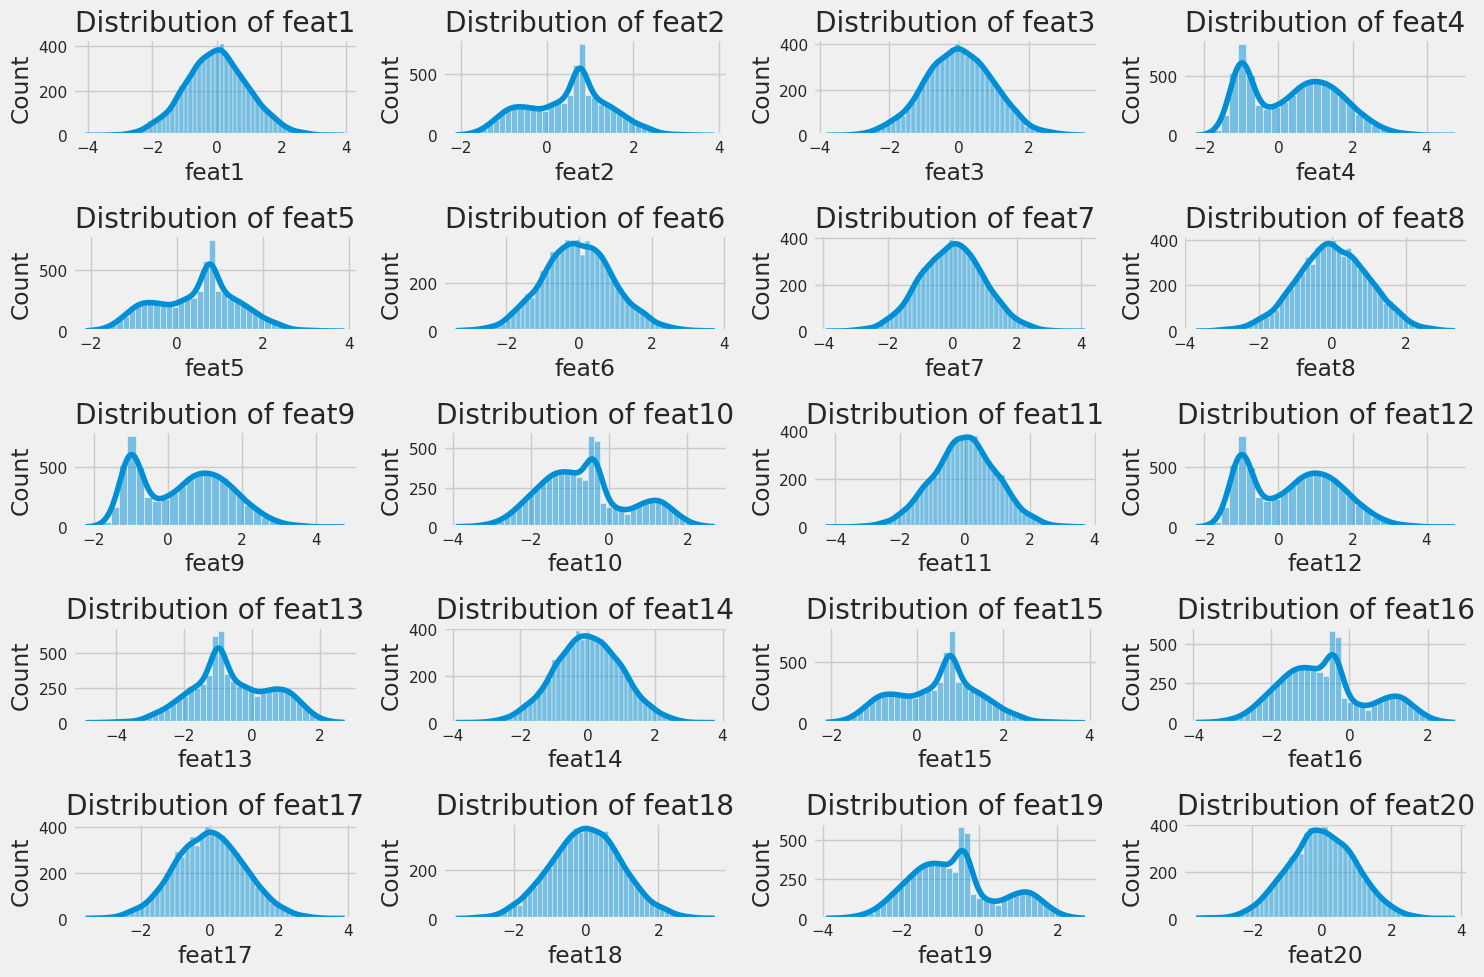

In [63]:
# Selecting only the numerical features
numerical_features = df.drop(columns=['Y']).columns

# Plotting the distribution of numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 4, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Correlation Matrix to find which features impacts Y

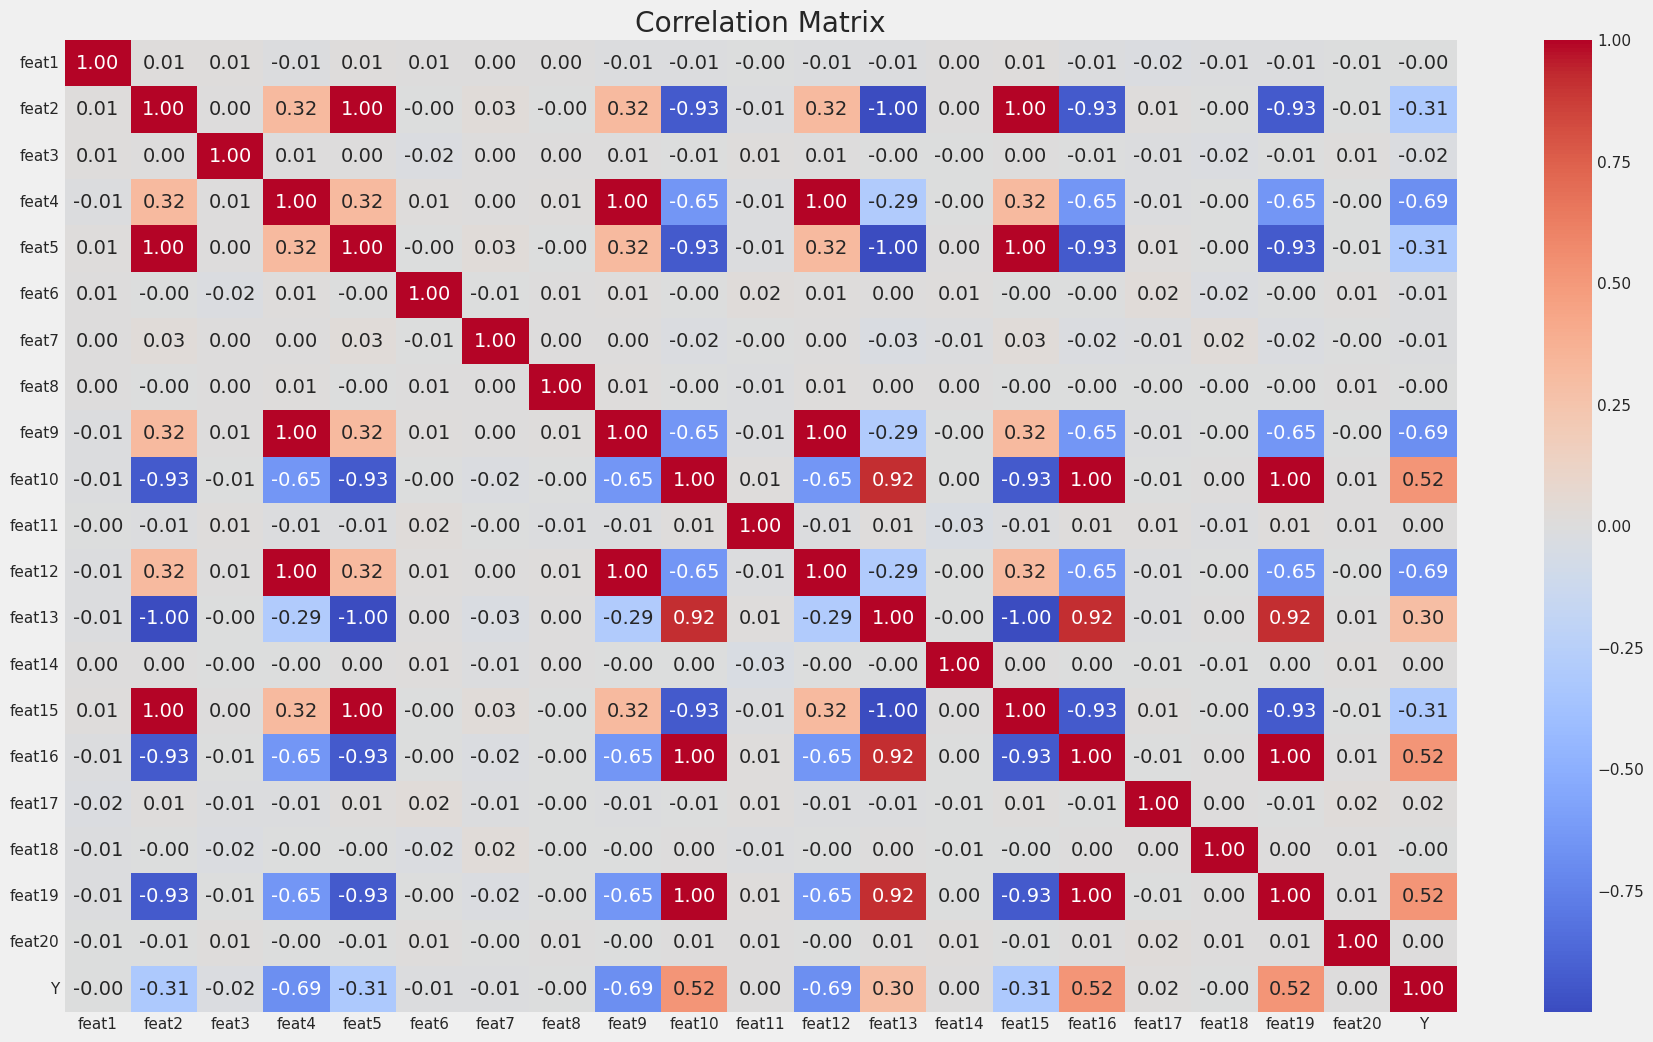

In [65]:
# Plot the correlation matrix
plt.figure(figsize=(20, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Training set - cluster data point count and overview

In [82]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import Counter

# Assuming 'Y' is the column you want to use for clustering
# Load the data
data = pd.read_csv('df_train.csv')  

# Extracting the feature for clustering
X = data[['Y']]

# Initialize KMeans with the number of clusters you want
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit KMeans to the data
kmeans.fit(X)

# Getting the cluster labels
cluster_labels = kmeans.labels_

# Count the number of values in each cluster
cluster_counts = Counter(cluster_labels)


# Print the number of values in each cluster
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} values")


print("----- Print the training set cluster data points -----")

# Concatenate cluster labels with the original DataFrame
data_with_clusters = pd.concat([data, pd.Series(cluster_labels, name='Cluster')], axis=1)

# Group data by cluster labels
cluster_groups = data_with_clusters.groupby('Cluster')

# Iterate through each cluster
for cluster_label, cluster_data in cluster_groups:
    print(f"Cluster {cluster_label}:")

    # Calculate summary statistics or examine the distribution of each feature
    print(cluster_data)

Cluster 2: 681 values
Cluster 0: 1346 values
Cluster 1: 4673 values
----- Print the training set cluster data points -----
Cluster 0:
      Customer      feat1     feat2     feat3     feat4     feat5     feat6  \
1             2 -0.552579 -2.122784 -0.909162 -1.683701 -2.122784  0.204391   
4             5 -1.094133 -1.783790  0.298936 -1.414102 -1.783790  0.845890   
13           14 -1.580064 -0.588490  1.503590 -0.855830 -0.588490 -0.284397   
21           22  0.090908 -0.793456  0.130878 -1.145613 -0.793456 -1.444940   
23           24 -0.866649 -1.149393  0.580566 -1.203933 -1.149393  1.925879   
...         ...       ...       ...       ...       ...       ...       ...   
6692       6693  0.247846 -0.833591 -1.731113 -1.087004 -0.833591 -0.477267   
6693       6694 -0.707163 -0.181880  1.480153 -0.667623 -0.181880  0.271552   
6695       6696 -0.131986 -0.902789  0.858997 -1.025185 -0.902789 -0.174383   
6697       6698  1.022117 -1.402107  1.537113 -1.242976 -1.402107  0.896712 

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Traning the models with cross validation

------------------------------------------
Logistic Regression: Test set Accuracy - 0.93
Logistic Regression: Precision - 0.92
Logistic Regression: Recall - 0.93
Logistic Regression: F1 Score - 0.92
Logistic Regression: Confusion Matrix:
[[889  14  24]
 [  6 245   2]
 [ 52   1 107]]
Logistic Regression: Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       927
           1       0.94      0.97      0.96       253
           2       0.80      0.67      0.73       160

    accuracy                           0.93      1340
   macro avg       0.90      0.87      0.88      1340
weighted avg       0.92      0.93      0.92      1340



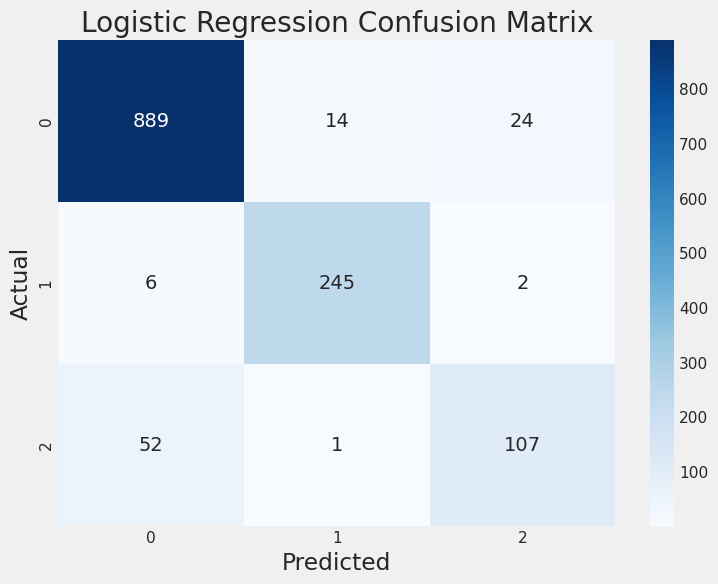

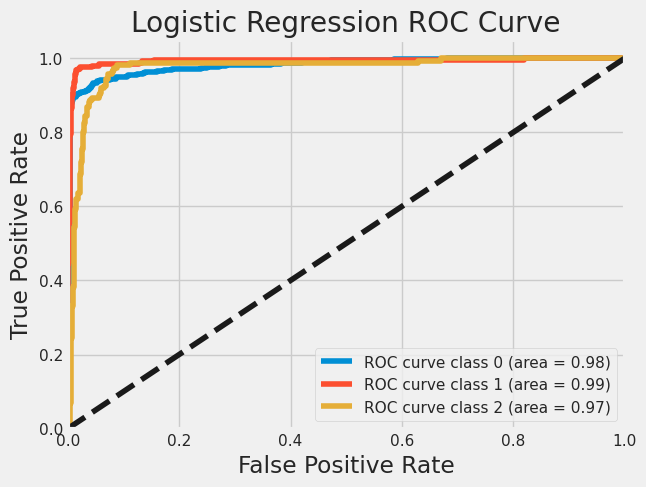

------------------------------------------
Decision Tree: Test set Accuracy - 0.98
Decision Tree: Precision - 0.98
Decision Tree: Recall - 0.98
Decision Tree: F1 Score - 0.98
Decision Tree: Confusion Matrix:
[[913   9   5]
 [  4 246   3]
 [  6   1 153]]
Decision Tree: Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       927
           1       0.96      0.97      0.97       253
           2       0.95      0.96      0.95       160

    accuracy                           0.98      1340
   macro avg       0.97      0.97      0.97      1340
weighted avg       0.98      0.98      0.98      1340



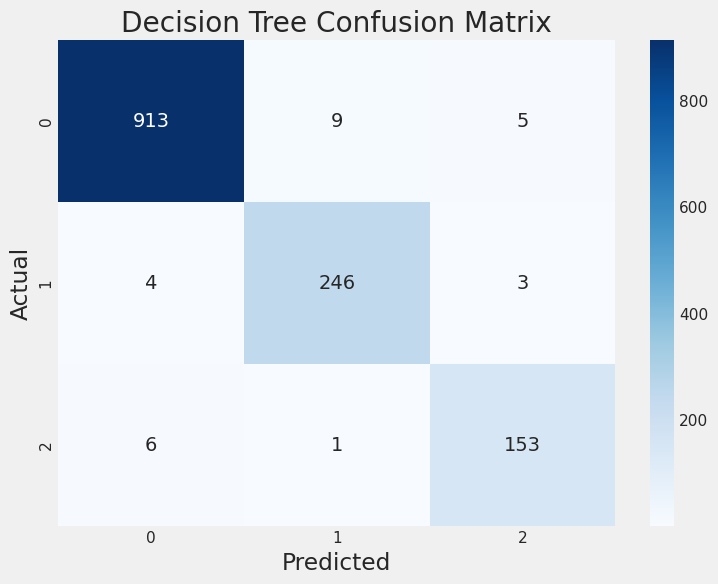

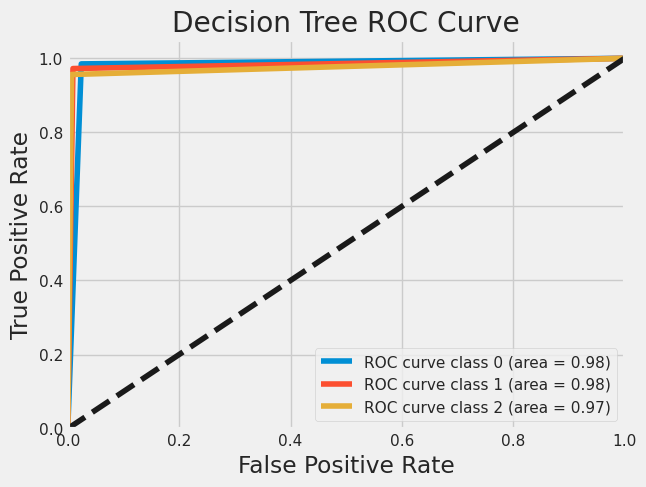

------------------------------------------
Random Forest: Test set Accuracy - 0.99
Random Forest: Precision - 0.99
Random Forest: Recall - 0.99
Random Forest: F1 Score - 0.99
Random Forest: Confusion Matrix:
[[921   4   2]
 [  4 247   2]
 [  2   1 157]]
Random Forest: Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       927
           1       0.98      0.98      0.98       253
           2       0.98      0.98      0.98       160

    accuracy                           0.99      1340
   macro avg       0.98      0.98      0.98      1340
weighted avg       0.99      0.99      0.99      1340



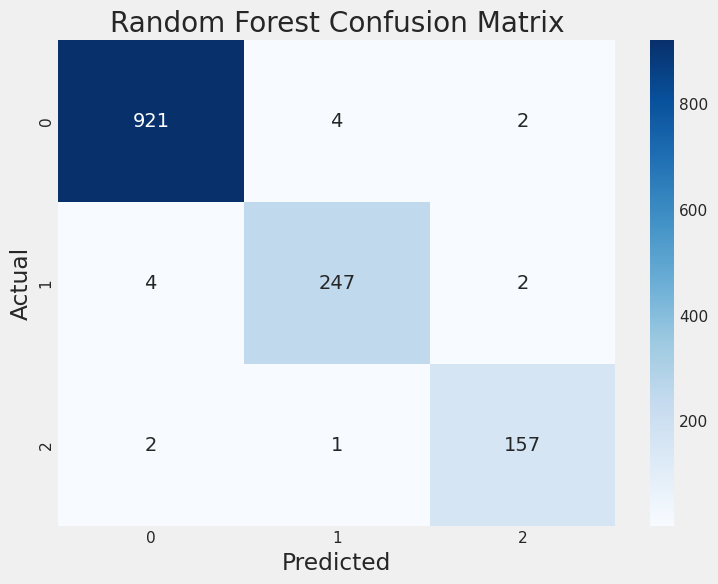

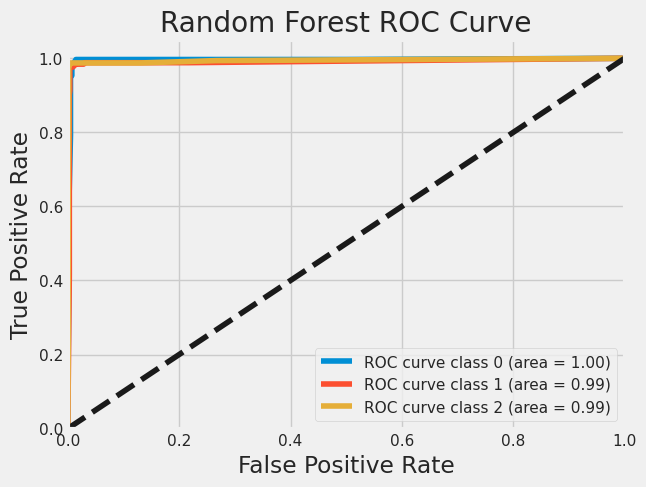

------------------------------------------
SVM: Test set Accuracy - 0.95
SVM: Precision - 0.95
SVM: Recall - 0.95
SVM: F1 Score - 0.95
SVM: Confusion Matrix:
[[899  11  17]
 [ 10 241   2]
 [ 23   1 136]]
SVM: Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       927
           1       0.95      0.95      0.95       253
           2       0.88      0.85      0.86       160

    accuracy                           0.95      1340
   macro avg       0.93      0.92      0.93      1340
weighted avg       0.95      0.95      0.95      1340



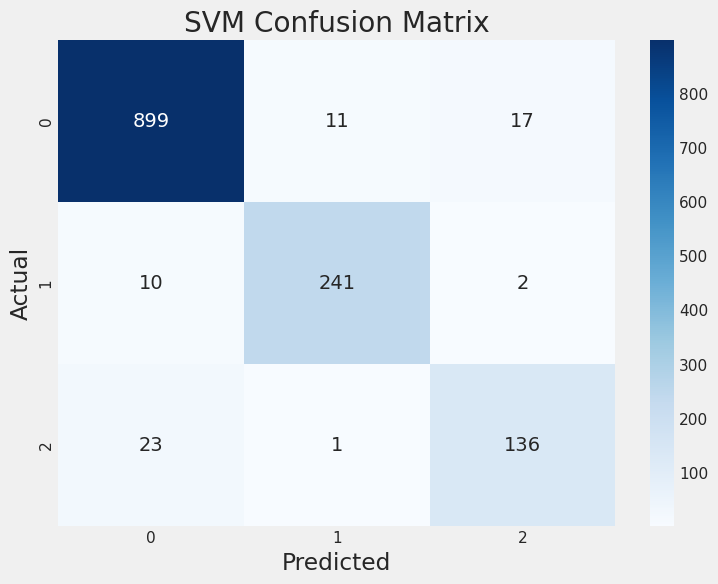

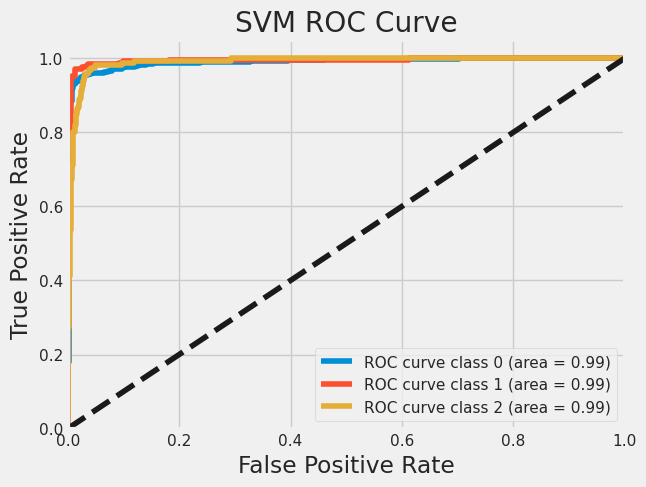

------------------------------------------
Gradient Boosting: Test set Accuracy - 0.98
Gradient Boosting: Precision - 0.98
Gradient Boosting: Recall - 0.98
Gradient Boosting: F1 Score - 0.98
Gradient Boosting: Confusion Matrix:
[[917   7   3]
 [  4 246   3]
 [  3   1 156]]
Gradient Boosting: Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       927
           1       0.97      0.97      0.97       253
           2       0.96      0.97      0.97       160

    accuracy                           0.98      1340
   macro avg       0.97      0.98      0.98      1340
weighted avg       0.98      0.98      0.98      1340



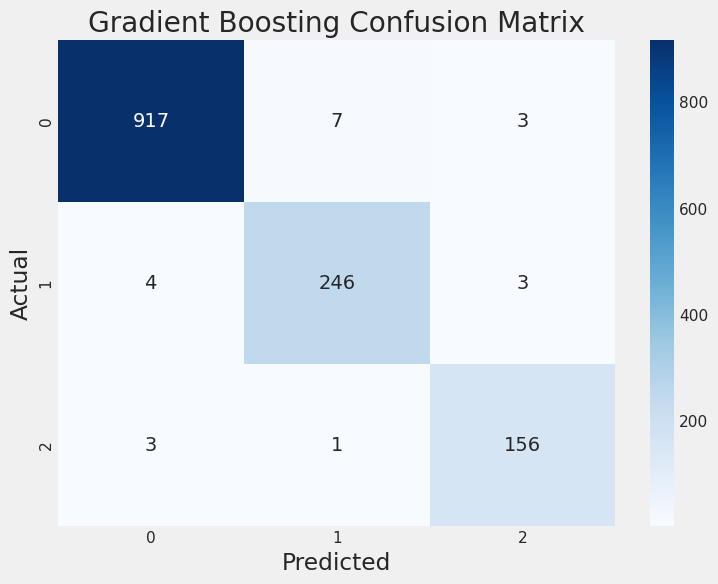

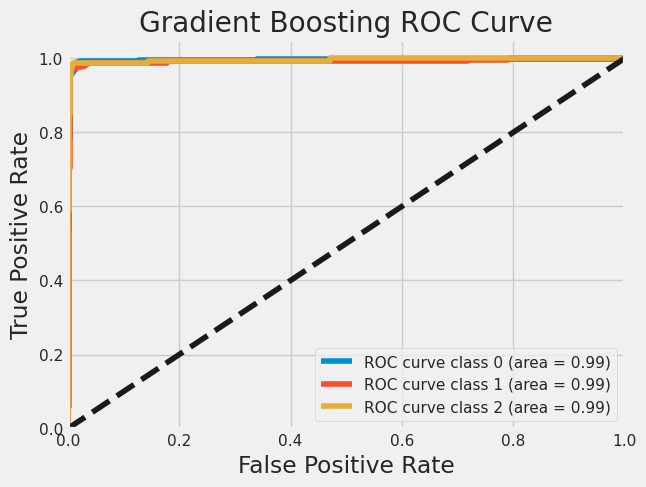

------------------------------------------
AdaBoost: Test set Accuracy - 0.96
AdaBoost: Precision - 0.96
AdaBoost: Recall - 0.96
AdaBoost: F1 Score - 0.96
AdaBoost: Confusion Matrix:
[[903  14  10]
 [  6 245   2]
 [ 16   1 143]]
AdaBoost: Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       927
           1       0.94      0.97      0.96       253
           2       0.92      0.89      0.91       160

    accuracy                           0.96      1340
   macro avg       0.95      0.95      0.95      1340
weighted avg       0.96      0.96      0.96      1340



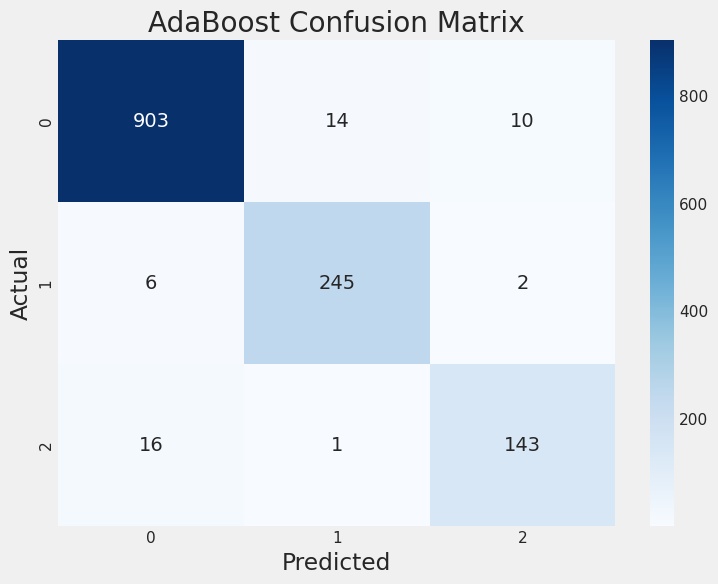

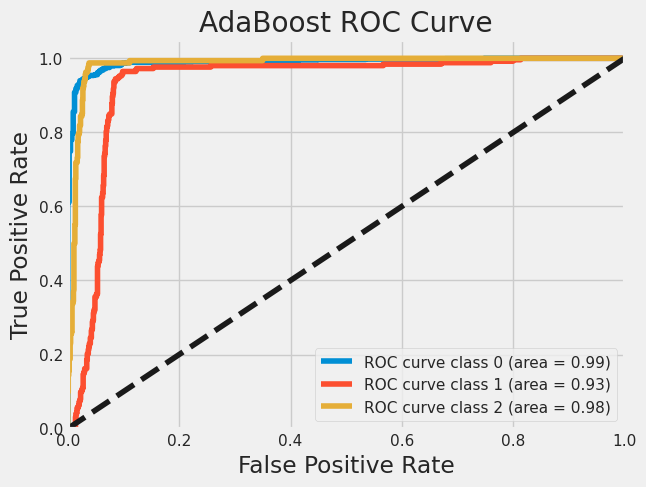

In [112]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import label_binarize

# Splitting data into features and target variable
X = df.drop(columns=['Y'])
y = df['Y']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Binarize the output for ROC curve
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

# Number of cross-validation folds
cv_folds = 5

# Train and evaluate models with cross-validation
for name, model in models.items():
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv_folds)
    #print(f"{name}: Cross-validation Accuracy - {cv_scores.mean():.2f} (+/- {cv_scores.std():.2f})")

    # Fit the model on the entire training set
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
        
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print evaluation metrics
    print("------------------------------------------")
    print(f"{name}: Test set Accuracy - {accuracy:.2f}")
    print(f"{name}: Precision - {precision:.2f}")
    print(f"{name}: Recall - {recall:.2f}")
    print(f"{name}: F1 Score - {f1:.2f}")
    print(f"{name}: Confusion Matrix:\n{cm}")
    print(f"{name}: Classification Report:\n{report}")
        # Confusion Matrix Visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # ROC Curve Visualization
    if hasattr(model, "predict_proba"):
        y_test_prob = model.predict_proba(X_test)
        fpr = {}
        tpr = {}
        roc_auc = {}
        for i in range(3):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        plt.figure()
        for i in range(3):
            plt.plot(fpr[i], tpr[i], label=f'ROC curve class {i} (area = {roc_auc[i]:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} ROC Curve')
        plt.legend(loc="lower right")
        plt.show()
    

# Models - test set predictions

In [114]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(df_test)
    print(f"{name}: predicted for test - ",y_pred)
   
    # Create a DataFrame from the predictions
    y_pred_df = pd.DataFrame(y_pred, columns=[f"{name}_predictions"])
    
    # Save the DataFrame to a CSV file
    y_pred_df.to_csv(f"{name}_predictions.csv", index=False)

Logistic Regression: predicted for test -  [0 0 2 ... 2 0 0]
Decision Tree: predicted for test -  [0 0 0 ... 0 0 0]
Random Forest: predicted for test -  [0 0 0 ... 0 0 0]
SVM: predicted for test -  [0 0 0 ... 2 0 0]
Gradient Boosting: predicted for test -  [0 0 0 ... 2 0 0]
AdaBoost: predicted for test -  [0 0 0 ... 2 2 0]
